In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
X =df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss=[]

In [9]:
for i in range(1,11):
    kmeans=KMeans(n_clusters =i , init = 'k-means++' ,random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

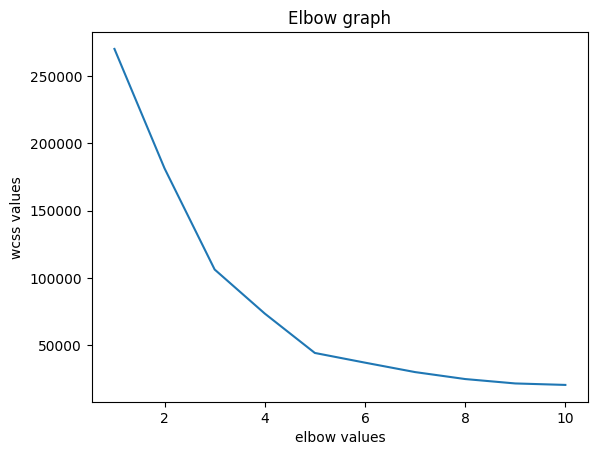

In [10]:
plt.plot(range(1,11) , wcss)
plt.title("Elbow graph")
plt.xlabel("elbow values")
plt.ylabel("wcss values")
plt.show()

In [11]:
kmeansmodel = KMeans(n_clusters =5 , init="k-means++" , random_state =0)

In [15]:
y_kmeans= kmeansmodel.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
X[y_kmeans == [0,0]] , X[y_kmeans == [0,1]]

/tmp/ipykernel_32/2869415490.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  X[y_kmeans == [0,0]] , X[y_kmeans == [0,1]]


(array([], shape=(0, 200, 2), dtype=int64),
 array([], shape=(0, 200, 2), dtype=int64))

Text(0.5, 1.0, 'cluster of customers')

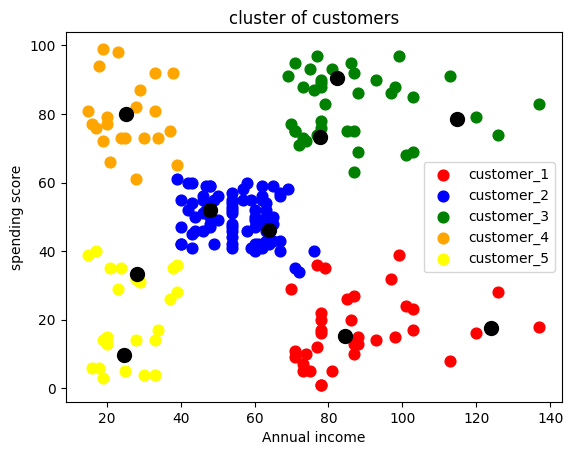

In [17]:
plt.scatter(X[y_kmeans ==0,0] , X[y_kmeans ==0,1] , s=60 , c="red",label="customer_1")
plt.scatter(X[y_kmeans ==1,0] , X[y_kmeans ==1,1] , s=60 , c="blue",label="customer_2")
plt.scatter(X[y_kmeans ==2,0] , X[y_kmeans ==2,1] , s=60 , c="green",label="customer_3")
plt.scatter(X[y_kmeans ==3,0] , X[y_kmeans ==3,1] , s=60 , c="orange",label="customer_4")
plt.scatter(X[y_kmeans ==4,0] , X[y_kmeans ==4,1] , s=60 , c="yellow",label="customer_5")
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=100 ,c="black")
plt.legend()
plt.xlabel("Annual income")
plt.ylabel("spending score")
plt.title("cluster of customers")